In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)


# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("health_clean.csv")
df

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
0,26,0,0,1,1,3,3,0,1,1,...,1,0,2,0,2,0,0,2,2,0
1,29,0,0,1,1,3,2,1,0,2,...,2,0,2,0,2,1,0,2,2,0
2,34,1,0,1,1,3,5,0,1,2,...,1,4,0,0,2,1,0,2,1,0
3,29,1,0,1,1,0,3,0,1,2,...,2,0,2,2,0,0,0,0,0,0
4,36,1,0,0,1,3,2,0,1,1,...,2,0,2,0,2,2,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35,1,0,0,0,3,2,1,1,2,...,2,0,0,0,2,1,2,2,2,0
1996,31,1,0,0,0,3,5,1,1,1,...,1,4,0,0,2,1,2,1,1,0
1997,43,1,1,0,0,3,5,1,1,2,...,2,0,0,0,2,1,0,2,2,0
1998,39,1,0,0,0,3,0,1,1,0,...,2,3,2,2,2,1,2,2,0,0


In [3]:
df.head()

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
0,26,0,0,1,1,3,3,0,1,1,...,1,0,2,0,2,0,0,2,2,0
1,29,0,0,1,1,3,2,1,0,2,...,2,0,2,0,2,1,0,2,2,0
2,34,1,0,1,1,3,5,0,1,2,...,1,4,0,0,2,1,0,2,1,0
3,29,1,0,1,1,0,3,0,1,2,...,2,0,2,2,0,0,0,0,0,0
4,36,1,0,0,1,3,2,0,1,1,...,2,0,2,0,2,2,0,2,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             2000 non-null   int64
 1   Gender                          2000 non-null   int64
 2   Self_Employed                   2000 non-null   int64
 3   Family_History                  2000 non-null   int64
 4   Treatment                       2000 non-null   int64
 5   Work_Interfere                  2000 non-null   int64
 6   Employee_Count_Company          2000 non-null   int64
 7   Remote_Work                     2000 non-null   int64
 8   Tech_Company                    2000 non-null   int64
 9   Benefits                        2000 non-null   int64
 10  Care_Options                    2000 non-null   int64
 11  Wellness_Program                2000 non-null   int64
 12  Seek_Help                       2000 non-null   int64
 13  Ano

In [5]:
df.isnull().sum()

Age                               0
Gender                            0
Self_Employed                     0
Family_History                    0
Treatment                         0
Work_Interfere                    0
Employee_Count_Company            0
Remote_Work                       0
Tech_Company                      0
Benefits                          0
Care_Options                      0
Wellness_Program                  0
Seek_Help                         0
Anonymity                         0
Medical_Leave                     0
Mental_Health_Consequence         0
Physical_Health_Consequence       0
Coworkers_Reach                   0
Supervisor_Reach                  0
Mental_Health_Interview           0
Physical_Health_Interview         0
Mental_VS_Physical                0
Observed_Consequence_Workplace    0
dtype: int64

In [6]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Work_Interfere'].fillna(df['Work_Interfere'].mode()[0], inplace=True)


<a id = '2.0'> </a>

<a id='3.1'>

In [7]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(df[column].value_counts())
    print() 

Self_Employed:
Self_Employed
0    1757
1     243
Name: count, dtype: int64

Family_History:
Family_History
0    1199
1     801
Name: count, dtype: int64

Treatment:
Treatment
1    1000
0    1000
Name: count, dtype: int64

Work_Interfere:
Work_Interfere
3    1169
0     332
2     276
1     223
Name: count, dtype: int64

Employee_Count_Company:
Employee_Count_Company
1    460
5    447
2    437
0    278
3    270
4    108
Name: count, dtype: int64

Remote_Work:
Remote_Work
0    1372
1     628
Name: count, dtype: int64

Tech_Company:
Tech_Company
1    1677
0     323
Name: count, dtype: int64

Benefits:
Benefits
1    752
2    630
0    618
Name: count, dtype: int64

Care_Options:
Care_Options
0    793
1    724
2    483
Name: count, dtype: int64

Wellness_Program:
Wellness_Program
0    1322
1     365
2     313
Name: count, dtype: int64

Seek_Help:
Seek_Help
0    1019
2     590
1     391
Name: count, dtype: int64

Anonymity:
Anonymity
2    1289
1     615
0      96
Name: count, dtype: int64

Medi

### Category Data Encoding

In [8]:
df['Observed_Consequence_Workplace'].value_counts()

Observed_Consequence_Workplace
0    1713
1     287
Name: count, dtype: int64

In [12]:
df["Observed_Consequence_Workplace"] = df["Observed_Consequence_Workplace"].astype(str)
df["Observed_Consequence_Workplace"] = df["Observed_Consequence_Workplace"].str.replace("Yes", "1")
df["Observed_Consequence_Workplace"] = df["Observed_Consequence_Workplace"].str.replace("No", "0")
df["Observed_Consequence_Workplace"] = df["Observed_Consequence_Workplace"].astype(int)

In [13]:
# Fill NaN values with an empty string to avoid issues
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].fillna("").astype(str)

# Perform the replacements
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].str.replace("Yes", "1")
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].str.replace("No", "0")
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].str.replace("Don't know", "2")

# Optionally, convert empty strings back to NaN if you want to keep missing data
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].replace("", np.nan)

# Convert the column back to integers if applicable
df["Mental_VS_Physical"] = df["Mental_VS_Physical"].astype(int)


In [14]:
# Step 1: Convert the column to string type
df["Physical_Health_Interview"] = df["Physical_Health_Interview"].astype(str)

# Step 2: Perform the replacements
df["Physical_Health_Interview"] = df["Physical_Health_Interview"].str.replace("Yes", "1")
df["Physical_Health_Interview"] = df["Physical_Health_Interview"].str.replace("No", "0")
df["Physical_Health_Interview"] = df["Physical_Health_Interview"].str.replace("Maybe", "2")

# Step 3: Convert the column back to integers (optional)
df["Physical_Health_Interview"] = df["Physical_Health_Interview"].astype(int)


In [16]:
# Step 1: Convert the column to string type
df["Mental_Health_Interview"] = df["Mental_Health_Interview"].astype(str)

# Step 2: Perform the replacements
df["Mental_Health_Interview"] = df["Mental_Health_Interview"].str.replace("Yes", "1")
df["Mental_Health_Interview"] = df["Mental_Health_Interview"].str.replace("No", "0")
df["Mental_Health_Interview"] = df["Mental_Health_Interview"].str.replace("Maybe", "2")

# Step 3: Convert the column back to integers (if applicable)
df["Mental_Health_Interview"] = df["Mental_Health_Interview"].astype(int)


In [17]:
# Step 1: Convert the column to string type
df["Supervisor_Reach"] = df["Supervisor_Reach"].astype(str)

# Step 2: Perform the replacements
df["Supervisor_Reach"] = df["Supervisor_Reach"].str.replace("Yes", "1")
df["Supervisor_Reach"] = df["Supervisor_Reach"].str.replace("No", "0")
df["Supervisor_Reach"] = df["Supervisor_Reach"].str.replace("Some of them", "2")

# Step 3: Convert the column back to integers (if applicable)
df["Supervisor_Reach"] = df["Supervisor_Reach"].astype(int)


In [18]:
# Step 1: Convert the column to string type
df["Coworkers_Reach"] = df["Coworkers_Reach"].astype(str)

# Step 2: Perform the replacements
df["Coworkers_Reach"] = df["Coworkers_Reach"].str.replace("Yes", "1")
df["Coworkers_Reach"] = df["Coworkers_Reach"].str.replace("No", "0")
df["Coworkers_Reach"] = df["Coworkers_Reach"].str.replace("Some of them", "2")

# Step 3: Convert the column back to integers (if applicable)
df["Coworkers_Reach"] = df["Coworkers_Reach"].astype(int)


In [19]:
# Step 1: Convert the column to string type
df["Physical_Health_Consequence"] = df["Physical_Health_Consequence"].astype(str)

# Step 2: Perform the replacements
df["Physical_Health_Consequence"] = df["Physical_Health_Consequence"].str.replace("Yes", "1")
df["Physical_Health_Consequence"] = df["Physical_Health_Consequence"].str.replace("No", "0")
df["Physical_Health_Consequence"] = df["Physical_Health_Consequence"].str.replace("Maybe", "2")

# Step 3: Convert the column back to integers (if applicable)
df["Physical_Health_Consequence"] = df["Physical_Health_Consequence"].astype(int)


In [21]:

# Step 1: Convert the column to string type to avoid .str.replace() issues
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].astype(str)

# Step 2: Perform the replacements
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].str.replace("Yes", "1")
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].str.replace("No", "0")
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].str.replace("Maybe", "2")

# Step 3: Convert the column back to integers
# Handle potential errors if there are empty strings or NaN after replacements
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].replace("", np.nan)  # Replace empty strings with NaN

# Convert to int, using nullable integer type to handle NaNs if needed
df["Mental_Health_Consequence"] = df["Mental_Health_Consequence"].astype(float).astype("Int64")  # Use Int64 to handle NaNs


In [23]:
# Step 1: Convert the column to string type
df["Medical_Leave"] = df["Medical_Leave"].astype(str)

# Step 2: Perform the replacements
df["Medical_Leave"] = df["Medical_Leave"].str.replace("Don't know", "0")
df["Medical_Leave"] = df["Medical_Leave"].str.replace("Somewhat difficult", "1")
df["Medical_Leave"] = df["Medical_Leave"].str.replace("Somewhat easy", "2")
df["Medical_Leave"] = df["Medical_Leave"].str.replace("Very easy", "3")

# Step 3: Optionally, convert back to integers
# Handle possible empty strings or NaN values after replacements
df["Medical_Leave"] = df["Medical_Leave"].replace("", np.nan)

# Convert the column to integer type, handling NaN with nullable integer type
df["Medical_Leave"] = df["Medical_Leave"].astype(float).astype("Int64")  # Nullable integer type to handle NaN


In [26]:
import pandas as pd
import numpy as np

# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({'Anonymity': ['Yes', 'No', "Don't know", None, 1, 0]})

# Step 1: Convert the column to string type
df["Anonymity"] = df["Anonymity"].astype(str)

# Step 2: Perform the replacements
# Instead of using na=False, we'll handle NaNs separately
df["Anonymity"] = df["Anonymity"].replace({"Yes": "1", "No": "0", "Don't know": "2"})

# Step 3: Handle possible empty strings or NaN values after replacements
df["Anonymity"] = df["Anonymity"].replace("", np.nan)

# Convert the column to integer type, handling NaN with nullable integer type
df["Anonymity"] = df["Anonymity"].astype(float).astype("Int64")  # Nullable integer type to handle NaN

# Check the results
print(df["Anonymity"].unique())


<IntegerArray>
[1, 2, 0]
Length: 3, dtype: Int64


In [28]:
df["Seek_Help"] = df["Seek_Help"].astype(str)
df["Seek_Help"] = df["Seek_Help"].fillna("Unknown")  # Replace NaN with "Unknown" or any suitable string
df["Seek_Help"] = df["Seek_Help"].str.replace("Yes", "1")
df["Seek_Help"] = df["Seek_Help"].str.replace("No", "0")
df["Seek_Help"] = df["Seek_Help"].str.replace("Don't know", "2")


In [30]:
df["Wellness_Program"] = df["Wellness_Program"].astype(str)
df["Wellness_Program"]=df["Wellness_Program"].str.replace("Yes","1")
df["Wellness_Program"]=df["Wellness_Program"].str.replace("No","0")
df["Wellness_Program"]=df["Wellness_Program"].str.replace("Don't know","2")

df["Wellness_Program"]=df["Wellness_Program"].astype("int32")

In [31]:
df["Care_Options"] = df["Care_Options"].astype(str)
df["Care_Options"] = df["Care_Options"].replace("Yes", "1")
df["Care_Options"] = df["Care_Options"].replace("No", "0")
df["Care_Options"] = df["Care_Options"].replace("Not sure", "2")

# Convert to int32, ignoring errors to handle unexpected values
df["Care_Options"] = pd.to_numeric(df["Care_Options"], errors="coerce").astype("Int32")


In [32]:
df["Benefits"] = df["Benefits"].astype(str)
df["Benefits"]=df["Benefits"].str.replace("Yes","1")
df["Benefits"]=df["Benefits"].str.replace("No","0")
df["Benefits"]=df["Benefits"].str.replace("Don't know","2")

df["Benefits"]=df["Benefits"].astype("int32")

In [33]:
df["Tech_Company"]=df["Tech_Company"].astype(str)
df["Tech_Company"]=df["Tech_Company"].str.replace("Yes","1")
df["Tech_Company"]=df["Tech_Company"].str.replace("No","0")
df["Tech_Company"]=df["Tech_Company"].astype("int32")

In [34]:
df["Remote_Work"]=df["Remote_Work"].astype(str)
df["Remote_Work"]=df["Remote_Work"].str.replace("Yes","1")
df["Remote_Work"]=df["Remote_Work"].str.replace("No","0")
df["Remote_Work"]=df["Remote_Work"].astype("int32")

In [35]:
df["Employee_Count_Company"] = df["Employee_Count_Company"].astype(str)
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("1-5", "0")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("6-25", "1")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("26-100", "2")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("100-500", "3")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("500-1000", "4")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("More than 1000", "5")

df["Employee_Count_Company"] = df["Employee_Count_Company"].astype("int32")


In [36]:
df["Work_Interfere"]=df["Work_Interfere"].astype(str)
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Never","0")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Often","1")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Rarely","2")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Sometimes","3")

df["Work_Interfere"]=df["Work_Interfere"].astype("int32")

In [38]:
df["Self_Employed"]=df["Self_Employed"].astype(str)
df['Self_Employed'].value_counts()

df["Self_Employed"]=df["Self_Employed"].str.replace("Yes","1")
df["Self_Employed"]=df["Self_Employed"].str.replace("No","0")
df["Self_Employed"]=df["Self_Employed"].astype("int32")

In [39]:
df["Gender"]=df["Gender"].astype(str)
df["Gender"]=df["Gender"].str.replace("Male","1")
df["Gender"]=df["Gender"].str.replace("Female","0")
df["Gender"]=df["Gender"].str.replace("Queer","2")

df["Gender"]=df["Gender"].astype("int32")

In [40]:
df["Family_History"]=df["Family_History"].astype(str)
df['Family_History'].value_counts()
df["Family_History"]=df["Family_History"].str.replace("No","0")
df["Family_History"]=df["Family_History"].str.replace("Yes","1")

df["Family_History"]=df["Family_History"].astype("int32")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2000 non-null   int64 
 1   Gender                          2000 non-null   int32 
 2   Self_Employed                   2000 non-null   int32 
 3   Family_History                  2000 non-null   int32 
 4   Treatment                       2000 non-null   int64 
 5   Work_Interfere                  2000 non-null   int32 
 6   Employee_Count_Company          2000 non-null   int32 
 7   Remote_Work                     2000 non-null   int32 
 8   Tech_Company                    2000 non-null   int32 
 9   Benefits                        2000 non-null   int32 
 10  Care_Options                    2000 non-null   Int32 
 11  Wellness_Program                2000 non-null   int32 
 12  Seek_Help                       2000 non-null   

In [42]:
df.Treatment.value_counts()

Treatment
1    1000
0    1000
Name: count, dtype: int64

In [ ]:
# df.to_csv('mentalh.csv',index =False)

In [43]:
X= df.drop('Treatment',axis = 1)
y = df['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)


In [44]:

import pandas as pd
dfmin= df[df['Treatment'] == 1]
dfmax= df[df['Treatment'] == 0]
from sklearn.utils import resample
dfminu = resample(dfmin, replace=True, n_samples =1000,random_state=123)
dfmaxd = resample(dfmax, replace=True, n_samples =1000,random_state=123)
df_dsampled = pd.concat([dfminu,dfmaxd])
df_dsampled['Treatment'].value_counts()

# Now, X_oversample and y_oversample should be of the same type as X and y, respectively

X=df_dsampled.drop("Treatment",axis=1)
# dependent feature
y=df_dsampled["Treatment"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)

In [45]:
df_dsampled.to_csv('health_clean.csv',index=False)

In [46]:
df_dsampled['Treatment'].value_counts()


Treatment
1    1000
0    1000
Name: count, dtype: int64

In [47]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.9233333333333333
********************
[0.94   0.92   0.9475 0.935  0.9425]
0.937
********************
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       300
           1       0.95      0.90      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

********************
92.33% Accurate
********************


In [49]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9316666666666666
train accuracy: 1.0
********************
0.9469999999999998
********************
********************
93.17% Accurate


In [62]:
def logistic_btn(request):
    dataset = Upload_dataset_model.objects.last()
    # print(dataset.Dataset)
    df=pd.read_csv('House_Hold_Energy Dataset\health_clean.csv')
    
    X = df.drop('Treatment', axis = 1)
    y = df['Treatment']
    from imblearn.over_sampling import SMOTE


    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
    # logistic regression

    LR = LogisticRegression()
    LR.fit(X_train, y_train)


    # prediction
    train_prediction= LR.predict(X_train)
    test_prediction= LR.predict(X_test)
    print('*'*20)

    # evaluation
    from sklearn.metrics import accuracy_score
    print('test accuracy:',accuracy_score(y_test,test_prediction))
    print('train accuracy:',accuracy_score(y_train,train_prediction))
    print('*'*20)

    # cross validation score
    from sklearn.model_selection import cross_val_score
    score=cross_val_score(LR,X,y,cv=5)
    print(score.mean())
    print('*'*20)


    print('*'*20)


    lr_HSC = accuracy_score(y_test,test_prediction)
    print(f"{round(lr_HSC*100,2)}% Accurate")
    

In [61]:
def XGBOOST_btn(request):
    dataset = Upload_dataset_model.objects.last()
    # print(dataset.Dataset)
    df=pd.read_csv('House_Hold_Energy Dataset\health_clean.csv')

    X = df.drop('Treatment', axis = 1)
    y = df['Treatment']

    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

    XGB = XGBClassifier()
    XGB.fit(X_train, y_train)

    # prediction
    train_prediction= XGB.predict(X_train)
    test_prediction= XGB.predict(X_test)
    print('*'*20)

    # evaluation
    from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
    print('test accuracy:',accuracy_score(y_test,test_prediction))
    print('test accuracy:',precision_score(y_test,test_prediction))
    print('test accuracy:',f1_score(y_test,test_prediction))
    print('test accuracy:',recall_score(y_test,test_prediction))
    accuracy = round(accuracy_score(y_test,test_prediction)*100, 2)
    precession = round(precision_score(y_test,test_prediction,average = 'macro')*100, 2)
    recall = round(recall_score(y_test,test_prediction,average = 'macro')*100, 2)
    f1 = round(f1_score(y_test,test_prediction,average = 'macro')*100, 2)    # Evaluation
    print('*'*20)
    print(accuracy, precession,recall,f1,'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
    print('train accuracy:',accuracy_score(y_train,train_prediction))
    print('*'*20)

    # cross validation score
    from sklearn.model_selection import cross_val_score
    score=cross_val_score(XGB,X,y,cv=5)
    print(score.mean())
    print('*'*20)


    print('*'*20)

    import pickle
    #save the model
    model = XGB  # Your machine learning model object
    file_path = 'xgboost.pkl'  # Path to the file where you want to save the model

    with open(file_path, 'wb') as file:
        pickle.dump(model, file)


    XGB_HSC = accuracy_score(y_test,test_prediction)
    print(f"{round(XGB_HSC*100,2)}% Accurate")


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # Add other hyperparameters you want to tune
}

# Create GridSearchCV object
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_ada_model = grid_search.best_estimator_

# Prediction
train_prediction = best_ada_model.predict(X_train)
test_prediction = best_ada_model.predict(X_test)

# Evaluation
print('*'*20)
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))
print('*'*20)

# Cross-validation score
best_score = grid_search.best_score_
print(f"Best Cross-validation Score: {best_score:.4f}")
print('*'*20)

# Prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction, y_test)
print(f"{round(ada_h*100, 2)}% Accurate")


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
********************
Test accuracy: 0.785
Train accuracy: 0.7992857142857143
********************
Best Cross-validation Score: 0.7714
********************
********************
78.5% Accurate


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.87
train accuracy: 0.9185714285714286
********************
0.8615
********************
********************
87.0% Accurate


In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert X_train and X_test to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_np, y_train)

# Prediction
train_prediction = knn_model.predict(X_train_np)
test_prediction = knn_model.predict(X_test_np)

# Evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)

print('*'*20)
# Prediction Summary by species
print(classification_report(y_test, test_prediction))

print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction, y_test)
print(f"{round(Knn_SC*100, 2)}% Accurate")


********************
Test accuracy: 0.805
Train accuracy: 0.8607142857142858
********************
Confusion Matrix:
[[245  55]
 [ 62 238]]
********************
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       300
           1       0.81      0.79      0.80       300

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81      0.81      0.80       600

********************
80.5% Accurate


In [70]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.88
1,Random Forest,0.87
6,GradientBoostingClassifier,0.86
0,Decision Tree,0.85
5,AdaBoost,0.83
3,Knn,0.82
2,Logistic Regression,0.80


In [71]:

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
Age,0.109651
Gender,0.030759
Self_Employed,0.012650
Family_History,0.099923
Work_Interfere,0.116687
Employee_Count_Company,0.059863
Remote_Work,0.025392
Tech_Company,0.018025
Benefits,0.055705
Care_Options,0.054720


In [72]:
imp_feature=imp_feature[imp_feature['feature importance']>0.04]
b=imp_feature.sort_values('feature importance')
b.index

Index(['Coworkers_Reach', 'Mental_Health_Consequence',
       'Physical_Health_Interview', 'Medical_Leave', 'Care_Options',
       'Benefits', 'Employee_Count_Company', 'Family_History', 'Age',
       'Work_Interfere'],
      dtype='object')

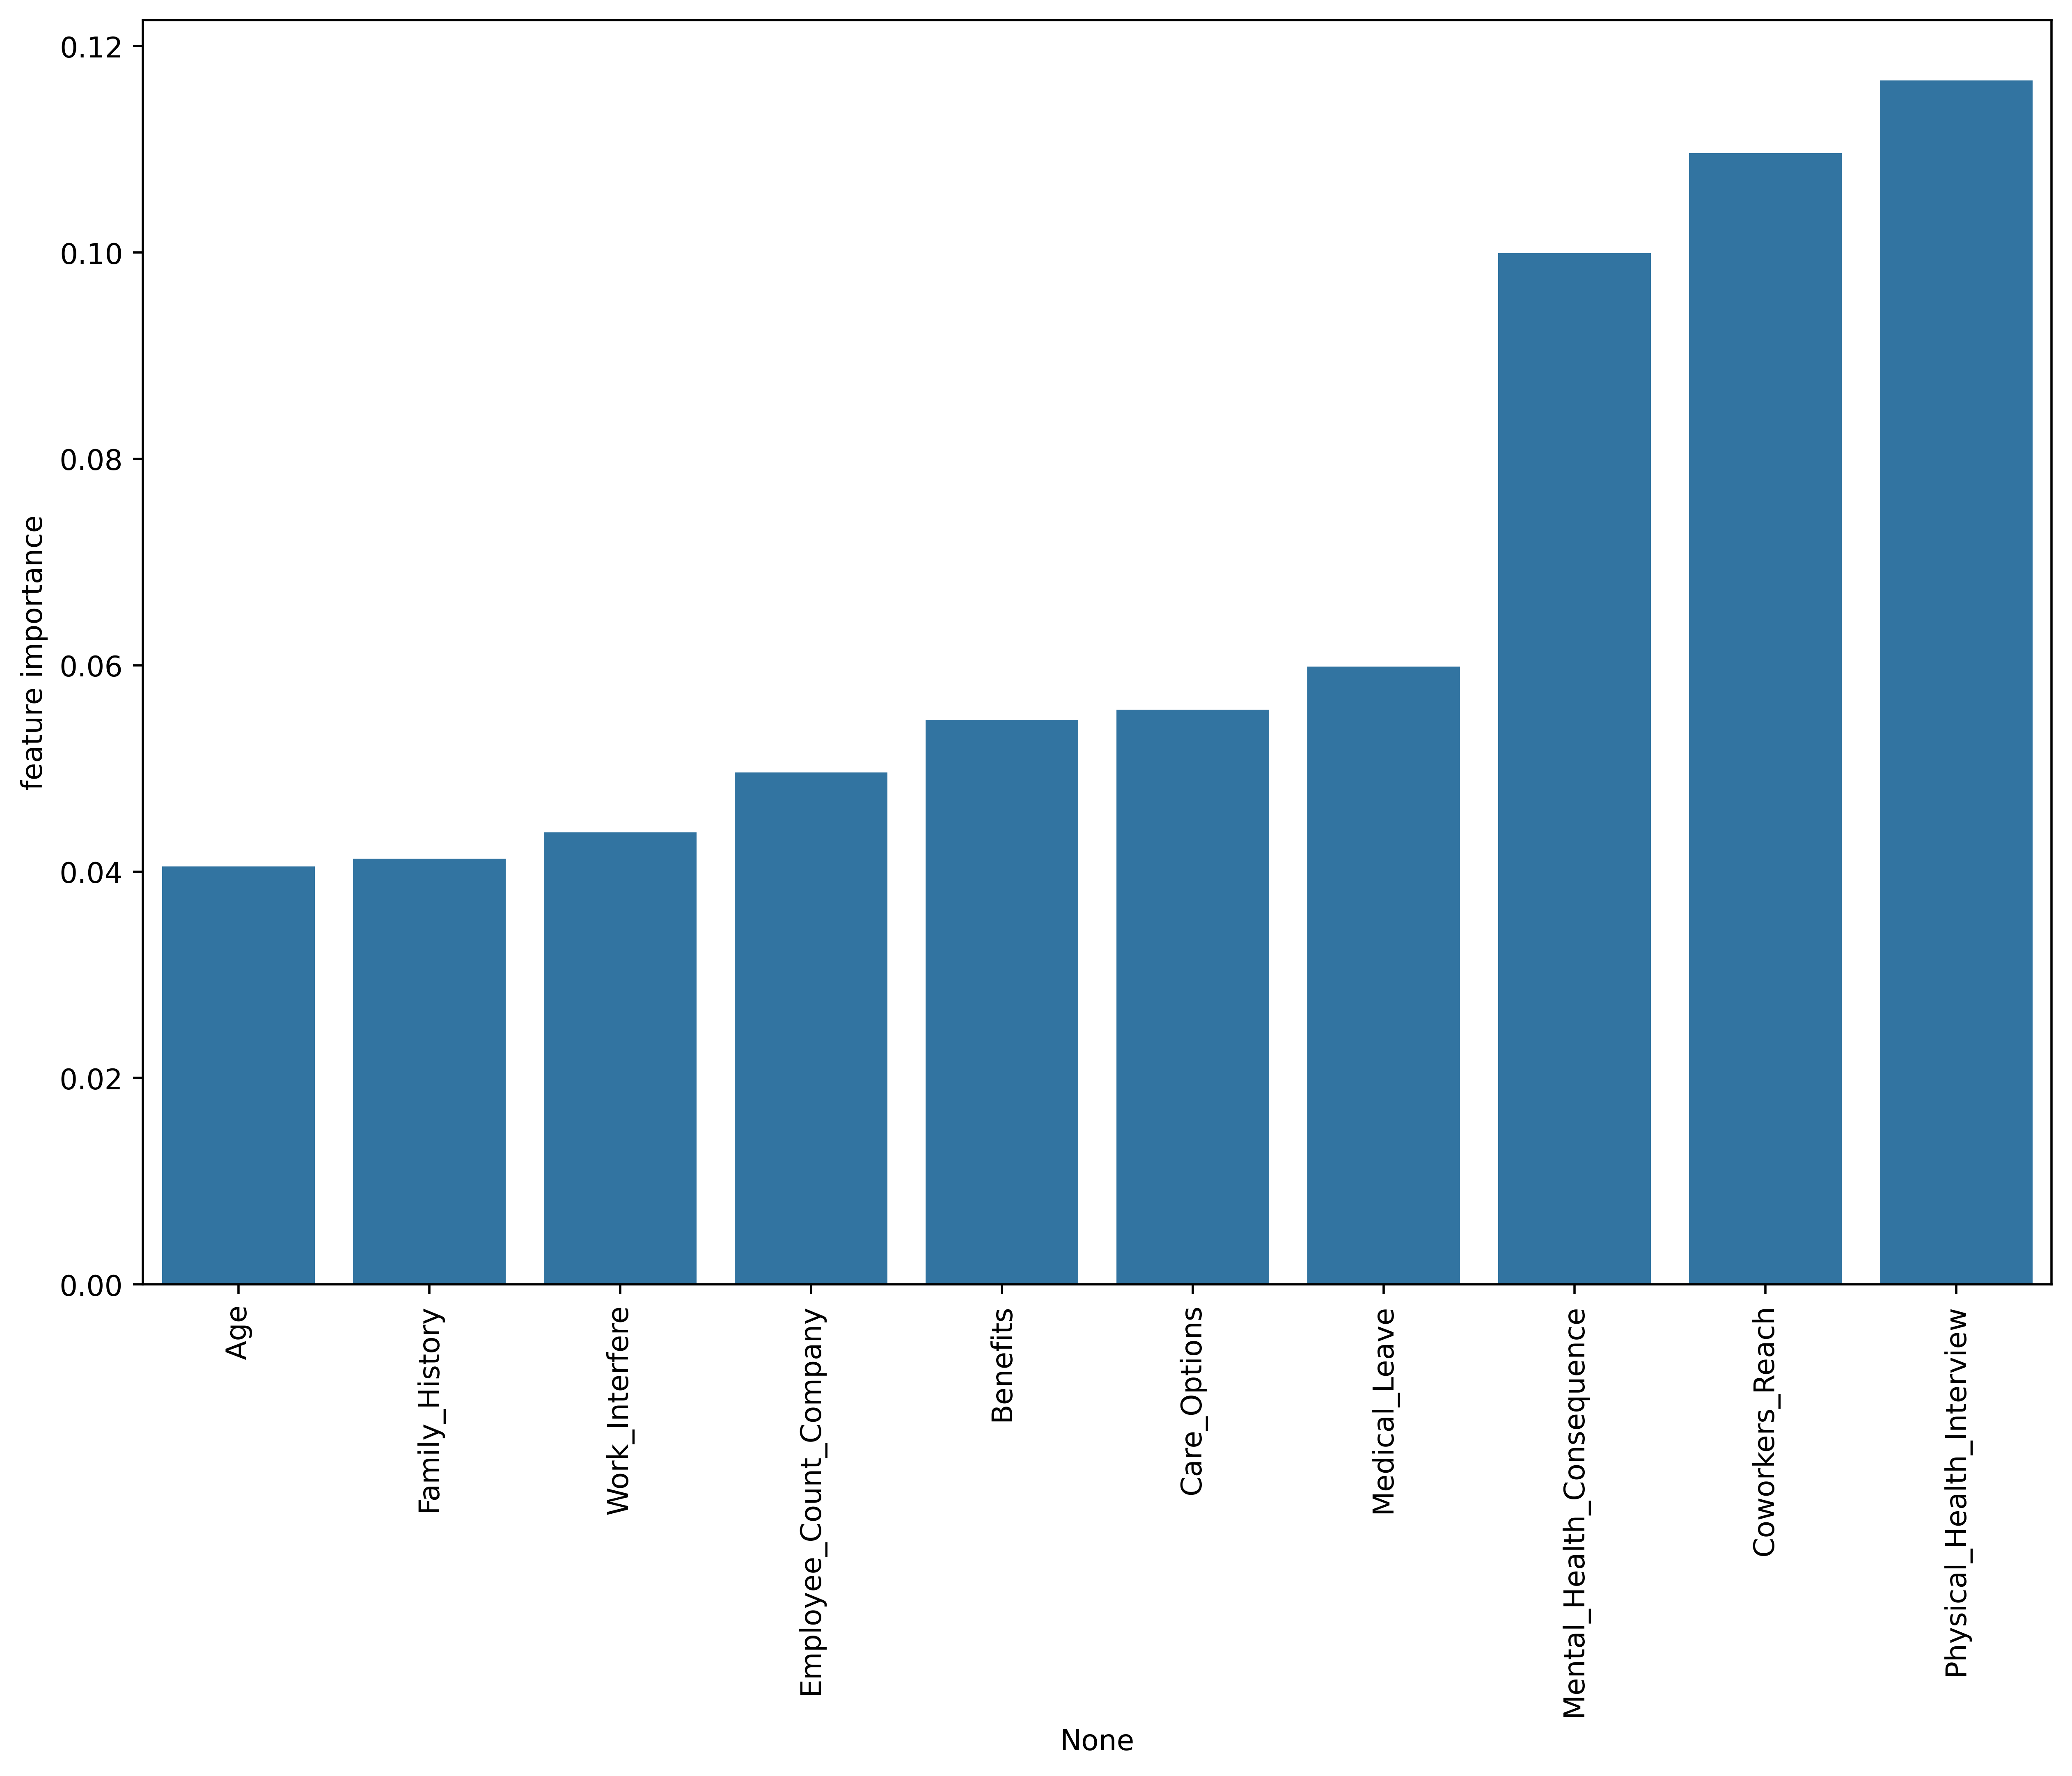

In [73]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [74]:
X=X[['Physical_Health_Interview', 'Medical_Leave', 'Care_Options',
       'Benefits', 'Employee_Count_Company', 'Family_History', 'Age',
       'Work_Interfere']]

In [75]:

import pandas as pd


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [76]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9275
train accuracy: 0.999375
********************
0.9385
********************
********************
92.75% Accurate


In [77]:
import pickle
#save the model
model = rfc  # Your machine learning model object
file_path = 'random.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [6]:
# load the model
import pickle

file_path = 'random.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

['Mental_VS_Physical', 'Coworkers_Reach', 'Physical_Health_Interview',
       'Mental_Health_Consequence', 'Supervisor_Reach', 'Care_Options',
       'Medical_Leave', 'Benefits', 'Employee_Count_Company', 'Family_History',
       'Age', 'Work_Interfere']]

In [79]:
X_train


,Physical_Health_Interview,Medical_Leave,Care_Options,Benefits,Employee_Count_Company,Family_History,Age,Work_Interfere
510,0,4,1,1,3,0,28,2
717,0,0,1,1,1,0,53,2
6,0,0,1,1,4,0,34,3
152,2,4,2,2,5,1,35,1
755,0,0,0,2,1,0,31,3
...,...,...,...,...,...,...,...,...
1632,2,1,0,0,0,0,31,0
1980,2,0,0,0,2,1,37,3
1969,2,0,1,1,5,0,37,0
130,2,0,0,2,1,1,42,3


In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# import pickle

# # Assuming ada_model is an AdaBoostClassifier instance
# ada_model = AdaBoostClassifier(random_state=42)

# # Fit the model on your training data
# ada_model.fit(X_train, y_train)

# # Save the model
# file_path = 'ada_mhp.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump(ada_model, file)

# # Load the model
# with open(file_path, 'rb') as file:
#     loaded_model = pickle.load(file)

# # Now you can make predictions
# predictions = loaded_model.predict([[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 35.0]])
# print(predictions)


[1]


In [80]:
predictions = loaded_model.predict([[2,	2,	6,	2,	3,	1,	6,	3]])
print(predictions)

[0]


<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>